## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

### Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [1]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Using TensorFlow backend.


In [0]:
from __future__ import absolute_import, division, print_function
import numpy as np
import keras
from keras.datasets import cifar10, mnist
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Reshape
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
import pickle
from matplotlib import pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (15, 8)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### Find no.of samples are there in training and test datasets

In [3]:
x_train.shape
y_train.shape
np.unique(y_train)
np.unique(y_test)

(60000, 28, 28)

(60000,)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [4]:
x_test.shape
y_test.shape

(10000, 28, 28)

(10000,)

### Find dimensions of an image in the dataset

In [5]:
x_train.shape
x_test.shape

(60000, 28, 28)

(10000, 28, 28)

In [6]:
np.unique(y_train)
np.unique(y_test)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

### Convert train and test labels to one hot vectors

** check `keras.utils.to_categorical()` **

In [0]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [8]:
np.unique(y_train)
np.unique(y_test)

array([0., 1.], dtype=float32)

array([0., 1.], dtype=float32)

In [9]:
y_train.shape
y_test.shape

(60000, 10)

(10000, 10)

### Normalize both the train and test image data from 0-255 to 0-1

In [0]:
x_train = x_train / 255.0
x_test = x_test / 255.0

### Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras

In [0]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')

### Import the necessary layers from keras to build the model

In [12]:
#Already done
np.unique(y_train)

array([0., 1.], dtype=float32)

In [13]:
x_train.shape

(60000, 28, 28, 1)

### Build a model 

** with 2 Conv layers having `32 3*3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with early stopping `patience=5` and no.of `epochs=10`. **

In [14]:
model = Sequential()

    # 1st Conv Layer
model.add(Convolution2D(32, 3, 3, input_shape=(28, 28, 1)))
    # Dropout
#model.add(Dropout(0.20))
model.add(Activation('relu'))


    # 2nd Conv Layer
model.add(Convolution2D(32, 3, 3))
    # Max Pooling
#model.add(MaxPooling2D(pool_size=(2,2)))
    # Dropout
#model.add(Dropout(0.20))
model.add(Activation('relu'))


#fully connected 
model.add(Flatten())
model.add(Dense(128))
    # Dropout
#model.add(Dropout(0.20))
model.add(Activation('relu'))

    # Prediction Layer
model.add(Dense(10))
model.add(Activation('softmax'))

 # Loss and Optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Store Training Results
early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=5, verbose=1, mode='auto')
callback_list = [early_stopping]# [stats, early_stopping]

BATCH_SIZE = 32
EPOCHS = 10

    # Train the model
model.fit(x_train, y_train, nb_epoch=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.30, callbacks=callback_list, verbose=True)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:41: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 [==============================] - 11s 257us/step - loss: 0.4115 - acc: 0.8519 - val_loss: 0.3145 - val_acc: 0.8840
Epoch 2/10
42000/42000 [==============================] - 8s 187us/step - loss: 0.2539 - acc: 0.9070 - val_loss: 0.2555 - val_acc: 0.9074
Epoch 3/10
42000/42000 [==============================] - 8s 187us/step - loss: 0.1835 - acc: 0.9329 - val_loss: 0.2516 - val_acc: 0.9070
Epoch 4/10
42000/42000 [==============================] - 8s 193us/step - loss: 0.1278 - acc: 0.9533 - val_loss: 0.2733 - val_acc: 0.9131
Epoch 5/10
42000/42000 [==============================] - 8s 197us/step - loss: 0.0867 - acc: 0.9668 - val_loss: 0.2843 - val_acc: 0.9129
Epoch 6/10
42000/42000 [==============================] - 8s 187us/step - loss: 0.0577 - acc: 0.9785 - val_loss: 0.3660 - val_acc: 0.9066
Epoch 7/10
42000/42000 [==============================] - 8s 187us/step - loss: 0.0387 - acc: 0.9860 - val_loss: 0.3923 -

In [15]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 24, 24, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               2359424   
_________________________________________________________________
activation_3 (Activation)    (None, 128)               0         
__________

### Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [16]:
model2 = Sequential()

    # 1st Conv Layer
model2.add(Convolution2D(32, 3, 3, input_shape=(28, 28, 1)))
    # Dropout
#model.add(Dropout(0.20))
model2.add(Activation('relu'))


    # 2nd Conv Layer
model2.add(Convolution2D(32, 3, 3))
    # Max Pooling
model2.add(MaxPooling2D(pool_size=(2,2)))
    # Dropout
model2.add(Dropout(0.25))
model2.add(Activation('relu'))


#fully connected 
model2.add(Flatten())
model2.add(Dense(128))
    # Dropout
#model.add(Dropout(0.20))
model2.add(Activation('relu'))

    # Prediction Layer
model2.add(Dense(10))
model2.add(Activation('softmax'))

 # Loss and Optimizer
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Store Training Results
early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=5, verbose=1, mode='auto')
callback_list = [early_stopping]# [stats, early_stopping]

BATCH_SIZE = 32
EPOCHS = 10

    # Train the model
model2.fit(x_train, y_train, nb_epoch=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.30, callbacks=callback_list, verbose=True)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:41: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 [==============================] - 7s 167us/step - loss: 0.4288 - acc: 0.8470 - val_loss: 0.3099 - val_acc: 0.8896
Epoch 2/10
42000/42000 [==============================] - 7s 157us/step - loss: 0.2799 - acc: 0.8979 - val_loss: 0.2634 - val_acc: 0.9044
Epoch 3/10
42000/42000 [==============================] - 7s 157us/step - loss: 0.2310 - acc: 0.9142 - val_loss: 0.2434 - val_acc: 0.9119
Epoch 4/10
42000/42000 [==============================] - 7s 157us/step - loss: 0.1925 - acc: 0.9282 - val_loss: 0.2454 - val_acc: 0.9158
Epoch 5/10
42000/42000 [==============================] - 7s 156us/step - loss: 0.1612 - acc: 0.9393 - val_loss: 0.2236 - val_acc: 0.9197
Epoch 6/10
42000/42000 [==============================] - 7s 164us/step - loss: 0.1355 - acc: 0.9484 - val_loss: 0.2348 - val_acc: 0.9207
Epoch 7/10
42000/42000 [==============================] - 7s 174us/step - loss: 0.1157 - acc: 0.9574 - val_loss: 0.2387 - 

### Now, to the above model, lets add Data Augmentation 

### Import the ImageDataGenrator from keras and fit the training images

In [0]:
from keras.preprocessing.image import ImageDataGenerator

# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False)  # randomly flip images

# Prepare the generator
datagen.fit(x_train)

#### Showing 5 versions of the first image in training dataset using image datagenerator.flow()

(0.0, 1.0, 0.0, 1.0)

[]

(0.0, 1.0, 0.0, 1.0)

[]

(0.0, 1.0, 0.0, 1.0)

[]

(0.0, 1.0, 0.0, 1.0)

[]

(0.0, 1.0, 0.0, 1.0)

[]

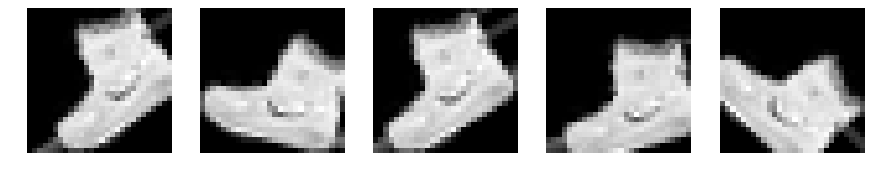

In [18]:
from matplotlib import pyplot as plt
gen = datagen.flow(x_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

### Run the above model using fit_generator()

In [19]:
TRAIN= True

model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
if TRAIN:
    model2.fit_generator(datagen.flow(x_train, y_train,
                        batch_size=BATCH_SIZE),
                        samples_per_epoch=x_train.shape[0],
                        nb_epoch=EPOCHS,
                        validation_data=(x_test, y_test), callbacks=callback_list)
    model2.save('./cnn_augment.h5')
else:
    print('Loading pretrained model...')
    model3 = keras.models.load_model('./cnn_augment.h5')
    print('Model Loaded.')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., callbacks=[<keras.ca..., steps_per_epoch=1875, epochs=10)`
  if __name__ == '__main__':


Epoch 1/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.7827 - acc: 0.7151 - val_loss: 0.3384 - val_acc: 0.8835
Epoch 2/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.5441 - acc: 0.7977 - val_loss: 0.3327 - val_acc: 0.8838
Epoch 3/10
1875/1875 [==============================] - 20s 10ms/step - loss: 0.4811 - acc: 0.8226 - val_loss: 0.3337 - val_acc: 0.8841
Epoch 4/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.4505 - acc: 0.8333 - val_loss: 0.3277 - val_acc: 0.8857
Epoch 5/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.4281 - acc: 0.8411 - val_loss: 0.3063 - val_acc: 0.8915
Epoch 6/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.4086 - acc: 0.8476 - val_loss: 0.3202 - val_acc: 0.8888
Epoch 7/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.3947 - acc: 0.8547 - val_loss: 0.3275 - val_acc: 0.8842
Epoch 8/10
1875/1875 [==========================

###  Report the final train and validation accuracy

In [25]:
print("Train acc: 0.8628")

Train acc: 0.8628


In [26]:
print("Train val_acc: 0.8890")

Train val_acc: 0.8890


## **DATA AUGMENTATION ON CIFAR10 DATASET**

One of the best ways to improve the performance of a Deep Learning model is to add more data to the training set. Aside from gathering more instances from the wild that are representative of the distinction task, we want to develop a set of methods that enhance the data we already have. There are many ways to augment existing datasets and produce more robust models. In the image domain, these are done to utilize the full power of the convolutional neural network, which is able to capture translational invariance. This translational invariance is what makes image recognition such a difficult task in the first place. You want the dataset to be representative of the many different positions, angles, lightings, and miscellaneous distortions that are of interest to the vision task.

### **Import neessary libraries for data augmentation**

### **Load CIFAR10 dataset**

In [0]:
import tensorflow as tf
# load data
(X_train_1, y_train_1), (X_test_1, y_test_1) = tf.keras.datasets.cifar10.load_data()

In [21]:
type(X_train_1)
X_train_1.shape

numpy.ndarray

(50000, 32, 32, 3)

In [0]:
X_train_1 = X_train_1.astype('float32')
X_test_1 = X_test_1.astype('float32')
X_train_1 = X_train_1 / 255.0
X_test_1 = X_test_1 / 255.0

### **Create a data_gen funtion to genererator with image rotation,shifting image horizontally and vertically with random flip horizontally.**

In [0]:
# This will do preprocessing and realtime data augmentation:
data_gen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False)  # randomly flip images

# Prepare the generator
data_gen.fit(X_train_1)

### **Prepare/fit the generator.**

### **Generate 5 images for 1 of the image of CIFAR10 train dataset.**

(0.0, 1.0, 0.0, 1.0)

[]

(0.0, 1.0, 0.0, 1.0)

[]

(0.0, 1.0, 0.0, 1.0)

[]

(0.0, 1.0, 0.0, 1.0)

[]

(0.0, 1.0, 0.0, 1.0)

[]

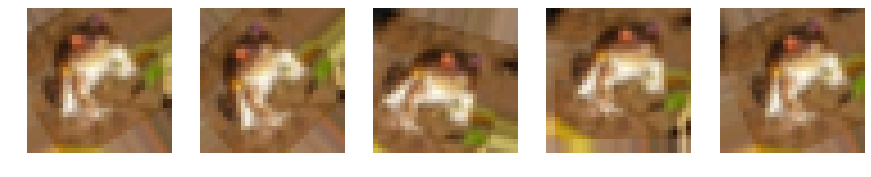

In [24]:
from matplotlib import pyplot as plt
gen = datagen.flow(X_train_1[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze())
    plt.plot()
plt.show()